<a href="https://colab.research.google.com/github/CAUKimJisu/Deep.Learn4AI_CAU/blob/main/week4/chapter03_introduction-to-keras-and-tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [3]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.25792933]
 [-0.09150977]
 [ 1.6012738 ]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.06602383]
 [0.70759606]
 [0.6862217 ]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [5]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**Creating a TensorFlow variable**

In [6]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.0535616],
       [1.8490891],
       [0.9924185]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [7]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [8]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [9]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [10]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [11]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

**Using `GradientTape` with constant tensor inputs**

In [12]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [13]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [14]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [15]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [16]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

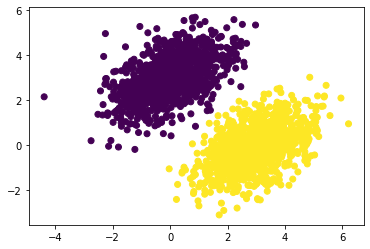

In [17]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [18]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [19]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [20]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [21]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [22]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.2610
Loss at step 1: 0.3907
Loss at step 2: 0.1542
Loss at step 3: 0.1175
Loss at step 4: 0.1065
Loss at step 5: 0.0992
Loss at step 6: 0.0929
Loss at step 7: 0.0872
Loss at step 8: 0.0819
Loss at step 9: 0.0771
Loss at step 10: 0.0727
Loss at step 11: 0.0686
Loss at step 12: 0.0649
Loss at step 13: 0.0615
Loss at step 14: 0.0583
Loss at step 15: 0.0555
Loss at step 16: 0.0528
Loss at step 17: 0.0504
Loss at step 18: 0.0482
Loss at step 19: 0.0462
Loss at step 20: 0.0443
Loss at step 21: 0.0426
Loss at step 22: 0.0410
Loss at step 23: 0.0396
Loss at step 24: 0.0383
Loss at step 25: 0.0371
Loss at step 26: 0.0360
Loss at step 27: 0.0350
Loss at step 28: 0.0340
Loss at step 29: 0.0332
Loss at step 30: 0.0324
Loss at step 31: 0.0317
Loss at step 32: 0.0310
Loss at step 33: 0.0304
Loss at step 34: 0.0298
Loss at step 35: 0.0293
Loss at step 36: 0.0289
Loss at step 37: 0.0284
Loss at step 38: 0.0280
Loss at step 39: 0.0277


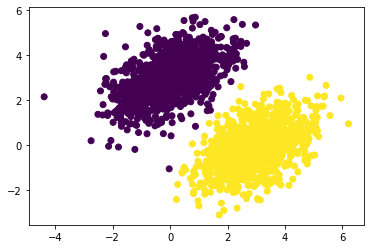

In [23]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

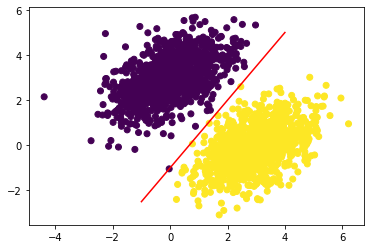

In [24]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [25]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [26]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [27]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [28]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [29]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [30]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [31]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [32]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 1s 3ms/step - loss: 12.7712 - binary_accuracy: 0.5075
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 12.2002 - binary_accuracy: 0.5075
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 11.7174 - binary_accuracy: 0.5075
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 11.2537 - binary_accuracy: 0.5070
Epoch 5/5
16/16 [==============================] - 0s 3ms/step - loss: 10.8009 - binary_accuracy: 0.5075


In [33]:
history.history

{'loss': [12.771228790283203,
  12.200169563293457,
  11.717422485351562,
  11.253691673278809,
  10.800874710083008],
 'binary_accuracy': [0.5074999928474426,
  0.5074999928474426,
  0.5074999928474426,
  0.5070000290870667,
  0.5074999928474426]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [34]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 5ms/step - loss: 0.5294 - binary_accuracy: 0.8743 - val_loss: 0.0476 - val_binary_accuracy: 0.9983
Epoch 2/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0751 - binary_accuracy: 0.9521 - val_loss: 0.0439 - val_binary_accuracy: 0.9967
Epoch 3/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0673 - binary_accuracy: 0.9593 - val_loss: 0.0347 - val_binary_accuracy: 0.9983
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0692 - binary_accuracy: 0.9593 - val_loss: 0.4308 - val_binary_accuracy: 0.7717
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0755 - binary_accuracy: 0.9521 - val_loss: 0.0846 - val_binary_accuracy: 0.9350


### Inference: Using a model after training

In [35]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 2ms/step
[[ 0.48826516]
 [-0.1817176 ]
 [ 0.01422101]
 [ 0.06208071]
 [ 0.53570104]
 [ 0.17446151]
 [-0.04890427]
 [ 0.6651808 ]
 [ 0.17989722]
 [ 0.08153433]]


## Summary

#**03.27 Practice**

- 2D 평면에 두 클래스의 랜덤한 포인트 생성하기

In [71]:
num_samples_per_class = 500
negative_samples = np.random.multivariate_normal(
    mean=[2, 3],
    cov=[[1, 0.2],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 1],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

<ipython-input-71-c572f7a5902a>:2: RuntimeWarning: covariance is not positive-semidefinite.
  negative_samples = np.random.multivariate_normal(


In [ ]:
negative_samples

In [ ]:
positive_samples

- 두 클래스를 한 배열로 쌓기

In [72]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

- (0과 1로 구성된) 타깃 생성하기

In [73]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

- 두 클래스의 포인트를 그래프로 나타내기

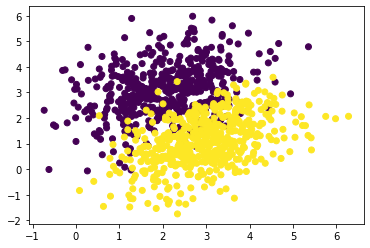

In [74]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

- 선형 분류기의 변수 만들기

In [75]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

- 정방향 패스 함수

In [76]:
def model(inputs):
    return tf.matmul(inputs, W) + b

- 평균 제곱 오차 손실 함수

In [77]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

- 훈련 스텝 함수

In [82]:
learning_rate = 0.02 #0.1로 하다가 줄임

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

- 배치 훈련 루프

In [83]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.1466
Loss at step 1: 0.1425
Loss at step 2: 0.1389
Loss at step 3: 0.1357
Loss at step 4: 0.1329
Loss at step 5: 0.1305
Loss at step 6: 0.1284
Loss at step 7: 0.1265
Loss at step 8: 0.1249
Loss at step 9: 0.1235
Loss at step 10: 0.1222
Loss at step 11: 0.1210
Loss at step 12: 0.1200
Loss at step 13: 0.1191
Loss at step 14: 0.1183
Loss at step 15: 0.1176
Loss at step 16: 0.1169
Loss at step 17: 0.1163
Loss at step 18: 0.1157
Loss at step 19: 0.1152
Loss at step 20: 0.1148
Loss at step 21: 0.1143
Loss at step 22: 0.1139
Loss at step 23: 0.1136
Loss at step 24: 0.1132
Loss at step 25: 0.1129
Loss at step 26: 0.1126
Loss at step 27: 0.1123
Loss at step 28: 0.1120
Loss at step 29: 0.1117
Loss at step 30: 0.1115
Loss at step 31: 0.1112
Loss at step 32: 0.1110
Loss at step 33: 0.1107
Loss at step 34: 0.1105
Loss at step 35: 0.1103
Loss at step 36: 0.1101
Loss at step 37: 0.1099
Loss at step 38: 0.1096
Loss at step 39: 0.1094


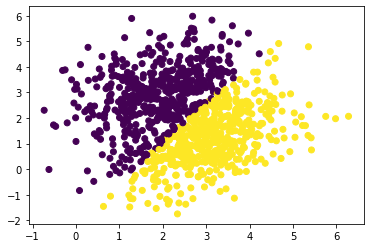

In [84]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

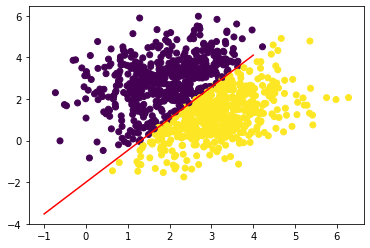

In [85]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

- 

In [86]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
44/44 [==============================] - 1s 6ms/step - loss: 22.2235 - binary_accuracy: 0.5157 - val_loss: 12.1223 - val_binary_accuracy: 0.4700
Epoch 2/5
44/44 [==============================] - 0s 4ms/step - loss: 6.0660 - binary_accuracy: 0.5200 - val_loss: 2.0263 - val_binary_accuracy: 0.4767
Epoch 3/5
44/44 [==============================] - 0s 3ms/step - loss: 0.6923 - binary_accuracy: 0.5643 - val_loss: 0.2102 - val_binary_accuracy: 0.6867
Epoch 4/5
44/44 [==============================] - 0s 4ms/step - loss: 0.1553 - binary_accuracy: 0.7900 - val_loss: 0.1175 - val_binary_accuracy: 0.8467
Epoch 5/5
44/44 [==============================] - 0s 4ms/step - loss: 0.1099 - binary_accuracy: 0.8714 - val_loss: 0.1032 - val_binary_accuracy: 0.8667
